María José Rimón Martínez

# ANNEX I

The following notebook shows the detailed code that has been followed throughout the whole process of the search for a possible oral drug against Alzheimer's disease, detailed in the "Final assignment" work 

## Ligand Based Virtual Screning

This first step focuses on the fact that ligands similar to an active ligand are more likely to be active than random ligands, prioritising candidate molecules rather than deciding whether a candidate molecule is active or not.

### Identified targets for the first UNIPROT code: P22303

We have the UNIPROT code of our target (Acetylcholinesterase) which is P22303. From it we want to look for CHEMBL identifiers that will help us with our further analysis. UNIPROT and CHEMBL have different identifiers. Let's start by finding the Chembl identifier from Uniprot.

In [154]:
# Libraries
import json  # lets us work with the json format
import requests  # allows Python to make web requests
import pandas as pd # analysis of tabular data
import numpy as np # numerical library

BASE_URL = "https://www.ebi.ac.uk/chembl/api/data/{:s}"

In [155]:
import rdkit
import matplotlib.pyplot as plt
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools
from rdkit.Chem import rdFingerprintGenerator
from ipywidgets import interact # widgets
import ipywidgets as widgets

In [156]:
#Finding CHEMBL from P22303 UNIPROT code.
target_protein_url = BASE_URL.format("target_component?accession=P22303")
print(target_protein_url)
target_components = requests.get(target_protein_url, headers={"Accept":"application/json"}).json()['target_components']
target_components[0]['targets']

https://www.ebi.ac.uk/chembl/api/data/target_component?accession=P22303


[{'target_chembl_id': 'CHEMBL220'}, {'target_chembl_id': 'CHEMBL2095233'}]

we have found two results, in order to select the one in which there is an interaction with a single protein and not with a protein family, we can ask about the "target type".

In [157]:
targets_list = ';'.join([i['target_chembl_id'] for i in target_components[0]['targets']])
targets_url = BASE_URL.format("target/set/{:s}".format(targets_list))
print(targets_url)
targets = requests.get(targets_url, headers={"Accept":"application/json"}).json()

https://www.ebi.ac.uk/chembl/api/data/target/set/CHEMBL220;CHEMBL2095233


In [158]:
for i in targets['targets']:
    print(i['target_chembl_id'], i['target_type'])

CHEMBL220 SINGLE PROTEIN
CHEMBL2095233 SELECTIVITY GROUP


The next step is finding which molecules are related to CHEMBL220 in order to find molecules that inhibit our protein target (Acetylcholinesterase).

Beside, We want to look only at the type of inhibition activity (IC50). It is important to know that the smaller the IC50 value, the more potent the inhibition is, since less molecule is needed to inhibit 50% of the acetylcholinerase enzyme. In this way, we have to sorted the results by IC50 type to select the best molecule.

In [159]:
#Define activity_url
activity_url = BASE_URL.format ("activity?target_chembl_id__exact=CHEMBL220&type=IC50&limit=0")
#activity_url = BASE_URL.format ("activity?target_chembl_id__exact=CHEMBL220&type=IC50&limit=0")
activity_request = requests.get(activity_url, headers={"Accept":"application/json"}).json()

# https://www.ebi.ac.uk/chembl/api/data/activity?target_chembl_id__exact=CHEMBL206 - check in the browser


In [160]:
activity_table = pd.DataFrame.from_dict(activity_request['activities'])[['molecule_chembl_id', 'type', 'standard_type', 'standard_value', 'standard_relation', 'standard_units', 'canonical_smiles']]
activity_table

,molecule_chembl_id,type,standard_type,standard_value,standard_relation,standard_units,canonical_smiles
0,CHEMBL133897,IC50,IC50,750.0,=,nM,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,IC50,IC50,100.0,=,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,IC50,IC50,50000.0,>,nM,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,IC50,IC50,300.0,=,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,IC50,IC50,800.0,=,nM,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
5,CHEMBL130112,IC50,IC50,2400.0,=,nM,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1
6,CHEMBL130098,IC50,IC50,100.0,=,nM,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
7,CHEMBL337486,IC50,IC50,50000.0,>,nM,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1
8,CHEMBL336538,IC50,IC50,800.0,=,nM,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
9,CHEMBL131051,IC50,IC50,50000.0,>,nM,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1


Now, among the different types of units we have of type IC50, let's filter by nano moles, which is the smallest value. Next, we will transform the standard_value column to float type to be able to work with it, we will delete the duplicated or empty columns, that is to say, we will clean the data.
Finally, we will sort the table by the smallest standard_value and reset the table indexes to start from zero.

In [161]:
activity_table_filter = activity_table.loc[activity_table['standard_units']=="nM"].copy().dropna()


# Select only values
activity_table_filter = activity_table_filter.loc[activity_table_filter['standard_relation']=="="]

#Transform the standard_value column to float to be able to work with it
activity_table_filter['standard_value'] = activity_table_filter['standard_value'].astype("float")

# Delete entries with missing values, NA values
activity_table_filter.dropna(axis=0, how="any", inplace=True)

#Order the table
activity_table_filter.sort_values(['standard_value'], inplace=True)

# remove duplicates molecules
activity_table_filter.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
                                      
# Reset index to fill the gaps
activity_table_filter.reset_index(drop=True, inplace=True)

activity_table_filter



,molecule_chembl_id,type,standard_type,standard_value,standard_relation,standard_units,canonical_smiles
0,CHEMBL340427,IC50,IC50,0.30,=,nM,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...
1,CHEMBL338755,IC50,IC50,0.30,=,nM,CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccc...
2,CHEMBL140476,IC50,IC50,0.32,=,nM,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
3,CHEMBL543655,IC50,IC50,0.32,=,nM,CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc...
4,CHEMBL208599,IC50,IC50,0.32,=,nM,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2
5,CHEMBL329012,IC50,IC50,0.33,=,nM,O=C(O)/C=C\C(=O)O.O=C1Cc2cc3c(CCC4CCN(Cc5ccccc...
6,CHEMBL94,IC50,IC50,0.43,=,nM,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
7,CHEMBL94546,IC50,IC50,0.48,=,nM,CN1C(=O)Cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc21...
8,CHEMBL329231,IC50,IC50,0.57,=,nM,O=C1CCc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc2N1
9,CHEMBL93936,IC50,IC50,0.80,=,nM,c1ccc(CN2CCC(CCc3noc4cc(N5CCOCC5)ccc34)CC2)cc1


In [162]:
activity_table.standard_type.value_counts()

IC50    1000
Name: standard_type, dtype: int64

Although the first two molecules listed in the table have the lowest IC50, it has been found by investigating the "Target summary" on the ChEMBL website for both molecules that the first one is not selective for AChE. Furthermore, the ChEMBL website itself provides information on RO5 (a rule that we will need to apply to extract potential drug candidates) and the second one does not comply with two parameters of this rule, so we cannot use it to search for related molecules, as most of them will also fail to comply with this rule.

Of the following molecules with the lowest IC50 CHEMBL208599 is the most selective of them all according to the information extracted from ChEMBL, and will therefore be chosen.



In [163]:
activity_table_filter[activity_table_filter.molecule_chembl_id=="CHEMBL208599"]

,molecule_chembl_id,type,standard_type,standard_value,standard_relation,standard_units,canonical_smiles
4,CHEMBL208599,IC50,IC50,0.32,=,nM,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2


In the following link you can find information from ChEMBL on the chosen molecule

In [164]:
targets_list = ';'.join(activity_table_filter[4:5]['molecule_chembl_id'])
targets_url = BASE_URL.format("molecule/set/{:s}".format(targets_list))
print(targets_url)
targets = requests.get(targets_url, headers={"Accept":"application/json"}).json()

https://www.ebi.ac.uk/chembl/api/data/molecule/set/CHEMBL208599


Relevant information about CHEMBL208599

In [165]:
sel_mol = "CHEMBL208599"
sel_mol_smile = activity_table_filter[activity_table_filter.molecule_chembl_id==sel_mol].iloc[0]['canonical_smiles']

print(sel_mol, sel_mol_smile)

print(activity_table_filter[activity_table_filter.molecule_chembl_id==sel_mol].iloc[0])

CHEMBL208599 CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2
molecule_chembl_id                                  CHEMBL208599
type                                                        IC50
standard_type                                               IC50
standard_value                                              0.32
standard_relation                                              =
standard_units                                                nM
canonical_smiles      CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2
Name: 4, dtype: object


### Checking for similar molecules

We can now visualise the selected molecule from its SMILE: CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2

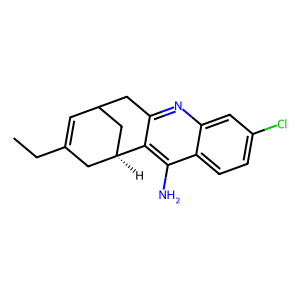

In [166]:
Query = rdkit.Chem.MolFromSmiles(sel_mol_smile)
#Depict Query molecule
rdkit.Chem.Draw.MolToImage(Query, includeAtomNumbers=True)

Now, we need to find molecules similar to the one we have selected in order to have a molecular database with which we can compare and which will allow us to continue our work.To achieve this, we will use the SwisSimilarity website [SwisSimilarity](http://www.swisssimilarity.ch/?), where we will upload the canonical smile of CHEMBL208599 and where we selected the "bioactive" compound as a class and used the combined screening method of 2D (using FP2, ECFP4, MHFP6, Pharmacophore, ErG, Scaffold and Generic Scaffold techniques) and the 3D method (using Electroshape and E3FP techniques), using the full CHEMBL database, ChEMBL (full database; 29). In this way we can find molecules that are not defined as inhibitors of our target but have the potential to be.

,ChemblID,Score,Smile,ROMol
0,CHEMBL208599,1.000,CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
1,CHEMBL1684449,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
2,CHEMBL1739491,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
3,CHEMBL4112162,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,
4,CHEMBL2021616,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,
5,CHEMBL140476,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
6,CHEMBL536047,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
7,CHEMBL1994202,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
8,CHEMBL2011499,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,
9,CHEMBL1684446,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,

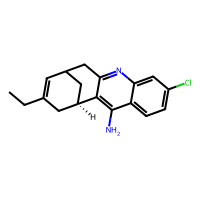
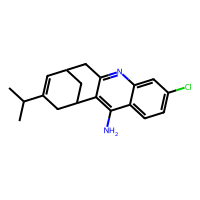
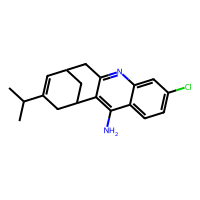
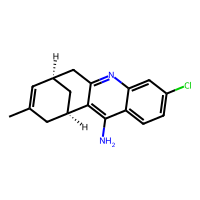
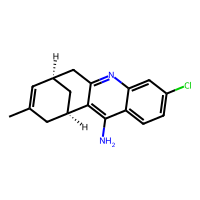
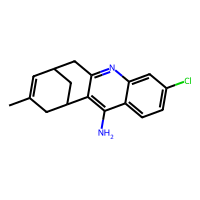
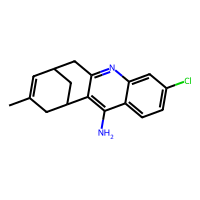
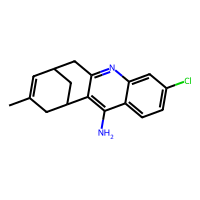
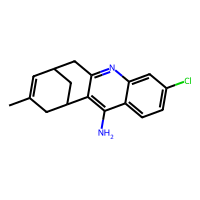
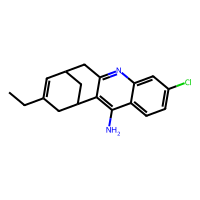
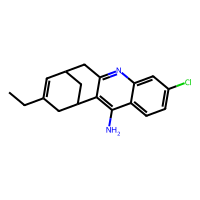
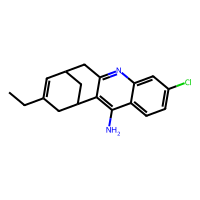
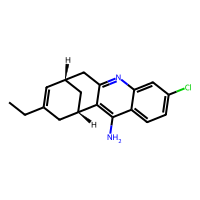
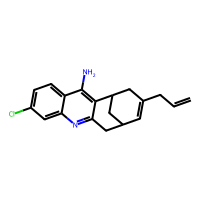
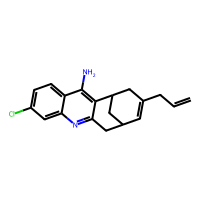
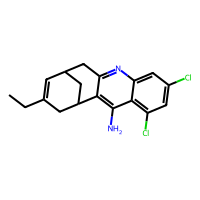
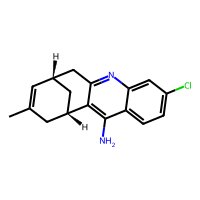
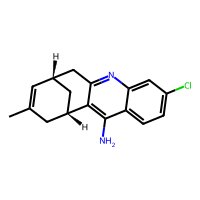
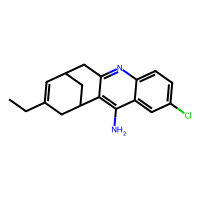
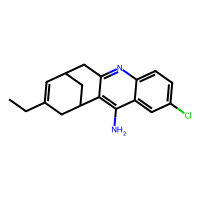
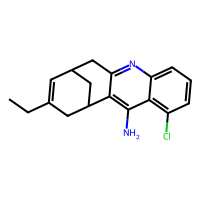
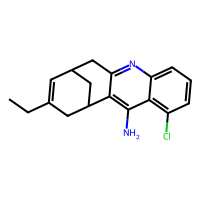
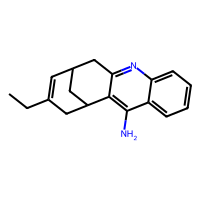
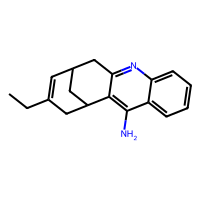
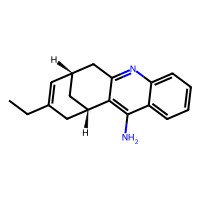
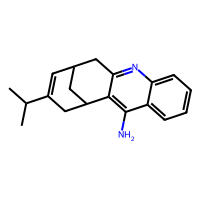
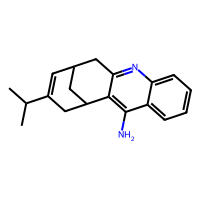
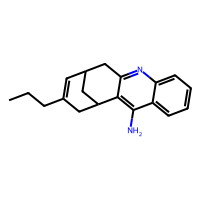
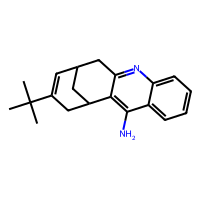
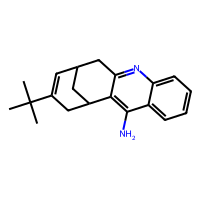
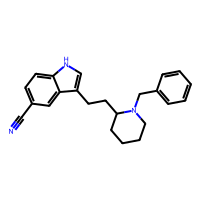
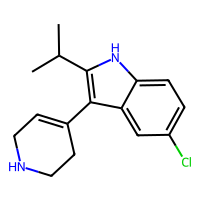
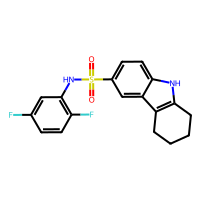
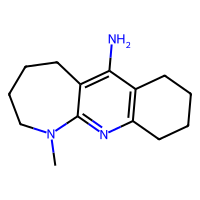
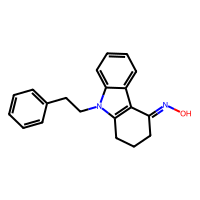
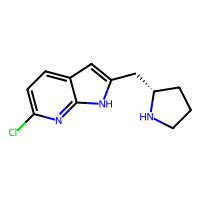
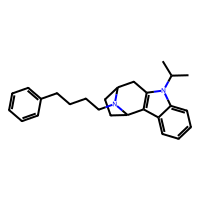
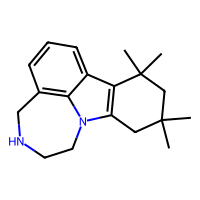
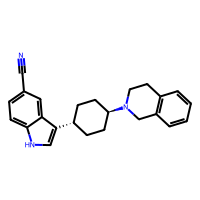
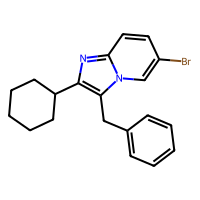
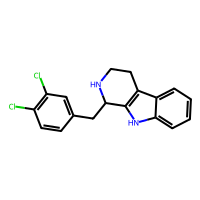
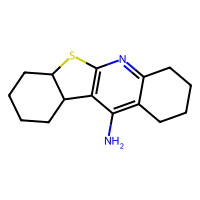
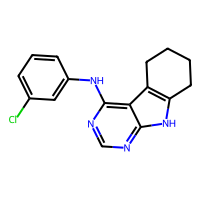
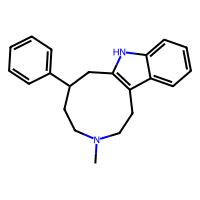
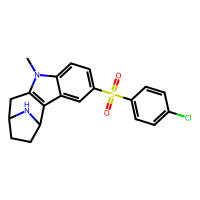
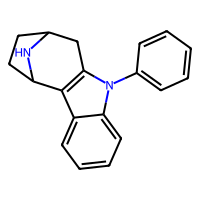
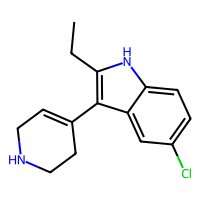
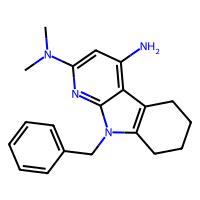
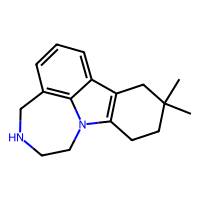
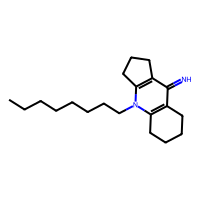
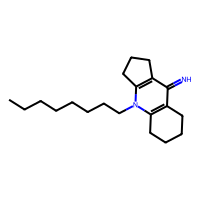
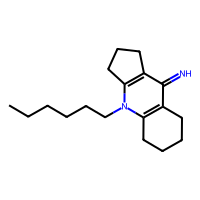
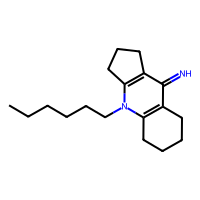
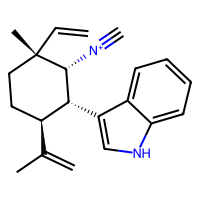
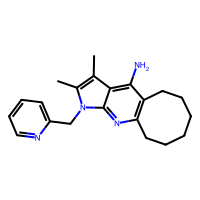
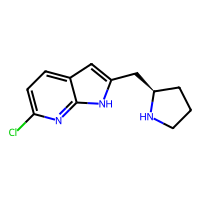
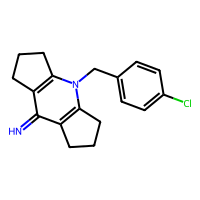
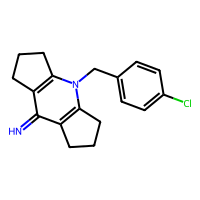
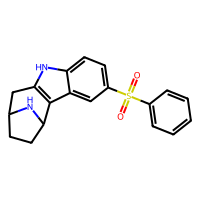
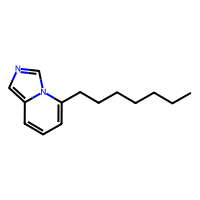

In [167]:
#We get the smiles for all the molecules similar to CHEMBL208599 which has a potent inhibitory affinity against CHEMBL220
swiss_table = pd.read_csv('./ScreeningResults_CHEMBL208599.csv', delimiter=';', header=None)
raw_database = swiss_table.set_axis(['ChemblID','Score','Smile'], axis=1, inplace=False)
PandasTools.AddMoleculeColumnToFrame(raw_database, smilesCol='Smile')
raw_database

Now, we have to analyze compound similarity using fingerprint method that will let us compare the proteins. There are two methods:
* MACCS keys (https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py: Molecular ACCess System (MACCS) fingerprints, also termed MACCS structural keys, consist of 166 predefined structural fragments. Each position queries the presence or absence of one particular structural fragment or key.
* Morgan Fingerprints (Circular fingerprints) ( (https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints): This family of fingerprints is based on the Morgan algorithm. The bits correspond to the circular environments of each atom in a molecule. The number of neighboring bonds and atoms to consider is set by the radius. Also the length of the bit string can be defined, a longer bit string will be modded to the desired length. Therefore, the Morgan fingerprint is not limited to a certain number of bits.

Each of this methods has its own advantages and disadvantages, so we will combine both for maximum accuracy.

In [168]:
#We build databases for the two methods
MACCSDatabase = raw_database.ROMol.apply(MACCSkeys.GenMACCSKeys)
MorganDatabase = rdFingerprintGenerator.GetFPs(raw_database["ROMol"].tolist())

In [169]:
#And prepare the queries:
MorganQuery = rdFingerprintGenerator.GetFPs([Query])[0]
MACCQuery = MACCSkeys.GenMACCSKeys(Query)

In [170]:
# We calculate this indices both for the MACCS fingerprints
raw_database["Tanimoto (MACCS)"] = rdkit.DataStructs.BulkTanimotoSimilarity(MACCQuery, MACCSDatabase)
raw_database["Dice (MACCS)"] = rdkit.DataStructs.BulkDiceSimilarity(MACCQuery, MACCSDatabase)
# And for the morgan fingerprint too
raw_database["Tanimoto (Morgan)"] = rdkit.DataStructs.BulkTanimotoSimilarity(MorganQuery, MorganDatabase)
raw_database["Dice (Morgan)"] = rdkit.DataStructs.BulkDiceSimilarity(MorganQuery, MorganDatabase)

Now we are going to compare the Tanimoto similarities based on MACCS and Morgan fingerprints. Therefore, we plot the Tanimoto similarities based on Morgen fingerprints vs. the Tanimoto similarities based on MACCS fingerprints

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


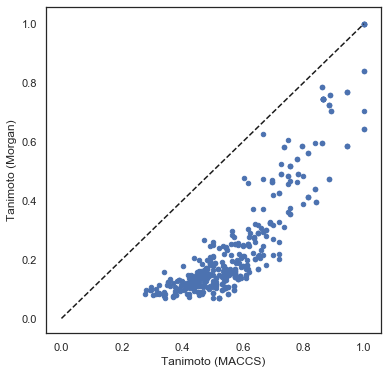

In [171]:
fig, ax = plt.subplots(figsize=(6, 6))
raw_database.plot("Tanimoto (MACCS)", "Tanimoto (Morgan)", kind="scatter", ax=ax)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("Tanimoto (MACCS)")
ax.set_ylabel("Tanimoto (Morgan)")
fig;

Now, we can have a look at the distributions by plotting histograms.

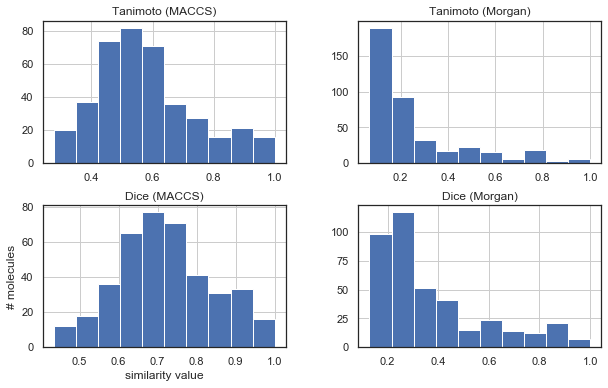

In [172]:
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
raw_database.hist(["Tanimoto (MACCS)"], ax=axes[0, 0])
raw_database.hist(["Tanimoto (Morgan)"], ax=axes[0, 1])
raw_database.hist(["Dice (MACCS)"], ax=axes[1, 0])
raw_database.hist(["Dice (Morgan)"], ax=axes[1, 1])
axes[1, 0].set_xlabel("similarity value")
axes[1, 0].set_ylabel("# molecules")
fig;

Decent results can be seen in these graphs, as the shape of the graphs closely resembles a normal distribution, meaning that the values are within an evaluable range and centred.

Lastly, we are going to directly compare Tanimoto and Dice similarities for the two fingerprints.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


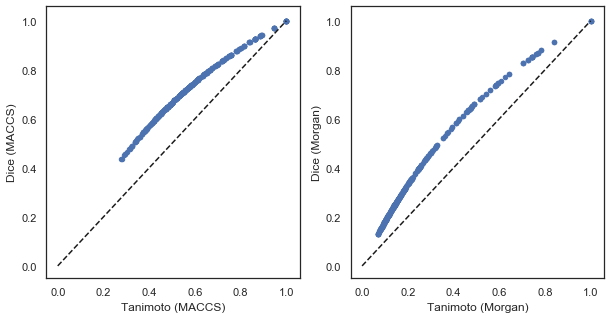

In [173]:
fig, axes = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

raw_database.plot("Tanimoto (MACCS)", "Dice (MACCS)", kind="scatter", ax=axes[0])
axes[0].plot([0, 1], [0, 1], "k--")
axes[0].set_xlabel("Tanimoto (MACCS)")
axes[0].set_ylabel("Dice (MACCS)")

raw_database.plot("Tanimoto (Morgan)", "Dice (Morgan)", kind="scatter", ax=axes[1])
axes[1].plot([0, 1], [0, 1], "k--")
axes[1].set_xlabel("Tanimoto (Morgan)")
axes[1].set_ylabel("Dice (Morgan)")

fig;

In [174]:
raw_database.describe()

,Score,Tanimoto (MACCS),Dice (MACCS),Tanimoto (Morgan),Dice (Morgan)
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.812005,0.579820,0.721519,0.252480,0.369566
std,0.142843,0.160858,0.124164,0.200924,0.212496
min,0.577000,0.277778,0.434783,0.068493,0.128205
25%,0.674000,0.471421,0.640769,0.122795,0.218731
50%,0.810500,0.550510,0.710102,0.167544,0.287001
75%,0.970500,0.666667,0.800000,0.291271,0.451136
max,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at this table we know that if we want to obtain the highest possible number of molecules we must use the Dice(MACCS) method, since the average of their values is around 0.7, while the rest are much lower.

The high values allow us to be restrictive when filtering, and so we choose a cutoff of 0.85 using Dice-Maccs.

In [175]:
raw_databasefilter = raw_database.loc[raw_database['Dice (MACCS)'].astype('float') > 0.85]
len(raw_databasefilter),
raw_databasefilter

,ChemblID,Score,Smile,ROMol,Tanimoto (MACCS),Dice (MACCS),Tanimoto (Morgan),Dice (Morgan)
0,CHEMBL208599,1.000,CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B48A...,1.000000,1.000000,1.000000,1.000000
1,CHEMBL1684449,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.891892,0.942857,0.703704,0.826087
2,CHEMBL1739491,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.891892,0.942857,0.703704,0.826087
3,CHEMBL4112162,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
4,CHEMBL2021616,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
5,CHEMBL140476,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
6,CHEMBL536047,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
7,CHEMBL1994202,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
8,CHEMBL2011499,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,0.864865,0.927536,0.745098,0.853933
9,CHEMBL1684446,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000022B49C...,1.000000,1.000000,1.000000,1.000000


In these last tables we can see that with the different similarity methods we have obtained a very low standard deviation, this is a very good sign, as this measure informs about the spread of the data with respect to the mean and how the error is shifted towards the extremes. The smaller the standard deviation, the smaller the error we get.

In [176]:
# save the result to a CSV file bioactivity_data.csv
raw_databasefilter.to_csv('raw_databasefilter_CHEMBL208599.csv', sep=';', index=False)

 ## Quantitative Structure-Activity Relationships (QSAR)

Quantitative structure-activity relationship, QSAR, is the process by which chemical structure is quantitatively correlated with a well-defined process, such as biological activity (binding of a drug to a receptor) or chemical reactivity (affinity of one substance for another to produce a reaction).

Obtaining a good quality QSAR model depends on many factors, such as the quality of the biological data, the choice of descriptors and statistical methods. Any QSAR modelling should ultimately lead to statistically robust models capable of making accurate and reliable predictions of the biological activities of new compounds.

In this section our aim will be to build the predictive model on which to apply the final database we obtained in our last work. This database contained molecules with a high inhibitory efficiency against our target molecule (CHEMBL220).

### Import libraries

We first import and download the necessary libraries

In [1]:
#Python module for machine learning 
!pip install scikit-learn

In [2]:
#statistical data visualization
!pip install seaborn 

In [2]:
import requests  # allows Python to make web requests
import pandas as pd # analysis of tabular data
import numpy as np # numerical library
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools, MACCSkeys
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import math
import matplotlib.pyplot as plt

import os

### Constans we're going to use in this notebook

- BASE_URL  The base url we use to build the query for data
- COLS_ACTIVITIES  Cols from the query that we store in the dataframe

In [3]:
# constants
import os
CUR_DIR = os.getcwd()
DATA_DIR = CUR_DIR #/ "data"


WEB_DOMAIN = "https://www.ebi.ac.uk{:s}"
BASE_URL = WEB_DOMAIN.format("/chembl/api/data/{:s}")


COLS_ACTIVITIES = ["activity_id", "assay_chembl_id", "assay_description", "assay_type", \
                   "molecule_chembl_id", "canonical_smiles", "standard_type", "standard_units",  \
                   "standard_relation", "standard_value", "target_chembl_id", "target_organism"]

# 1) Dataset, getting and processing data

We will now generate a series of utility functions for querying https://www.ebi.ac.uk/ in order to get a consistent data, filtering, removing unwanted data (NA, duplicates, wrong units, etc)

##### Function convert_ic50_to_pic50

converts an IC50 value in nM to pIC50

In [4]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

###### function curate_molecules

The function curate_molecules "cleans" the database and converts the columns to the required data type.
- Convert the standard_value column to float type so that its value can be used to calculate pIC50. 
- Remove rows with empty or unassigned fields.
- Filter the standard_unit column leaving only those containing nM, so that the standard_value values are comparable.
- Remove duplicates in the molecule_chembl_id column leaving only the first occurrence of the molecule.
- Update the table index to be able to scroll through the table correctly

In [5]:
# this function does the cleaning of the data, curates the data. Adjust the data type of standard_value to float
# removes records with missing values, filters data, remove duplicates and reset index for later use.
def curate_molecules(molecules):
    # Convert datatype of "standard_value" from "object" to "float"
    # Use standard_value in the right way, it's a float we needed it for computations
    molecules = molecules.astype({"standard_value": "float64"})    
    
    # Delete entries with missing values, NA values
    molecules.dropna(axis=0, how="any", inplace=True)
    
    # filter standard_type = IC50 ;  Usually we only have IC50 values because we apply the filter in the url
    # yet another more check in case we got the data from another source
    molecules = molecules[molecules["standard_type"] == "IC50"]
    
    # filter standard_units = nM
    molecules = molecules[molecules["standard_units"] == "nM"]
    
    # filter standard_relation = '=' For predictions we have to use "equals" values, no "more than" nor "less than"
    # because they are not the actual value.
    molecules = molecules[molecules["standard_relation"] == "="]
    
    #Before drop duplicates, keeeping first, sort by value, because we are looking for lowest value
    molecules.sort_values(['standard_value'], inplace=True)

    # remove duplicates molecules
    molecules.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)    
    
    # Reset index to fill the gaps
    molecules.reset_index(drop=True, inplace=True)
   
    #molecules.head()    
    return molecules

##### function getActivitiesForTargetMolecule

This function build the url to get the activities which have "molecule" as target_molecule.
By default gets IC50 type records with a limit 0 and we can apply more filters

We make a request of the data from the url, curate the data with our utility function "curate", we add a new column with the calculated pIC50 with the function convert_ic50_to_pic50 and finally we add the ROMol col with AddMoleculeColumnToFrame.

This is a utility function we're going to use to get data from https://www.ebi.ac.uk

With this functions, and the utility funtions we use inside the function, we have now the requested values for farther study, IC50 (col standard_value), pIC50 (calculated from IC50), ROMol (for calculating fingerprints)

In [6]:
def getActivitiesForTargetMolecule(molecule = 'CHEMBL220', standard_type = 'IC50', limit = 0, filterplus = ''):

    # filterplus -> To apply more filters, e.g. filterplus = "&standard_type=IC50")
    service = 'activity?{:s}'
    filter = f'limit={limit}&target_chembl_id__exact={molecule}&standard_type__exact={standard_type}&data_validity_comment__isnull=true{filterplus}'
    url = BASE_URL.format(service)
    url = url.format(filter)
    print(url)

    response_act = requests.get(url, headers={"Accept":"application/json"})
    response_act.raise_for_status()
    js_act=response_act.json()

    df_act = pd.DataFrame.from_dict(js_act['activities'])[COLS_ACTIVITIES]
    
    if limit == 0: limit = 1000
    
    while (js_act['page_meta']['next'] != None) and (len(df_act) < limit):
        url = WEB_DOMAIN.format(js_act['page_meta']['next'])

        response_act = requests.get(url, headers={"Accept":"application/json"})
        response_act.raise_for_status()
        js_act=response_act.json()
        
       
        df_act = df_act.append(pd.DataFrame.from_dict(js_act['activities'])[COLS_ACTIVITIES])
        
    # Apply conversion to each row of the compounds DataFrame. Standard values converted to log scale
    # we know al the molecules are IC50 type, because we filtered the data with the url "&standard_type__exact=IC50"
    # add new column to dataframe, we need now standard_value as float
    df_act = curate_molecules(df_act)
    df_act["pIC50"] = df_act.apply(lambda x: convert_ic50_to_pic50(x.standard_value), axis=1)
    
    # we also need the ROMol column
    PandasTools.AddMoleculeColumnToFrame(df_act, smilesCol="canonical_smiles")

    return df_act


# 2) Model Building

Now that we have everything we need, it is time to build our model based on the molecule that we have been using as a target so far, CHEMBL220

### Descriptor calculation 

We will build a simple Regression Model using Random Forest. The variables we will need to generate are:
- Y variable: pIC50

- X variable: molecular fingerprint

#####  smiles_to_fp function 

Generates the fingerprints of a given molecule from its smile using the ROMol column.

In [7]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str     The SMILES string defining the molecule.
    method : str     The type of fingerprint to use. Default is MACCS keys.
    n_bits : int     The length of the fingerprint.

    Returns
    -------
    array        The fingerprint array.
    """
 
    mol = Chem.MolFromSmiles(smiles)  # Convert smiles to RDKit mol object

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

Now, by calling the function getActivitiesForTargetMolecule we get all the filtered and processed information of our CHEMBL220 target molecule from the database that can be seen under this command box.

In addition, we will ask the function to take 2000 molecules. By default, when we put limit=0 in the database, the program extracts 1000 molecules, but for the results to be as reliable as possible, we ask it to take 2000 molecules (there are almost 6000 molecules in the database, but if we ask it to give us all of them, the program blocks because of the amount of information).

In [8]:
df3 = getActivitiesForTargetMolecule(molecule = 'CHEMBL220', limit=2000, filterplus = '&standard_relation__exact==')

https://www.ebi.ac.uk/chembl/api/data/activity?limit=2000&target_chembl_id__exact=CHEMBL220&standard_type__exact=IC50&data_validity_comment__isnull=true&standard_relation__exact==


The next step is to use the smiles column of our database and get the fingerprints using the smiles_to_fp function.

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,canonical_smiles,standard_type,standard_units,standard_relation,standard_value,target_chembl_id,target_organism,pIC50,ROMol,fingerprints_df
0,2077390,CHEMBL945890,Inhibition of human AchE,B,CHEMBL225567,O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3cc(Cl)...,IC50,nM,=,0.0200,CHEMBL220,Homo sapiens,10.698970,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1845186,CHEMBL914529,Inhibition of human brain AchE,B,CHEMBL225198,O=C(CCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl...,IC50,nM,=,0.0200,CHEMBL220,Homo sapiens,10.698970,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1670758,CHEMBL864026,Inhibition of human AChE,B,CHEMBL372202,COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5cc(Cl)c...,IC50,nM,=,0.0400,CHEMBL220,Homo sapiens,10.397940,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1670762,CHEMBL864026,Inhibition of human AChE,B,CHEMBL381499,O=C(CCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1c[n...,IC50,nM,=,0.1000,CHEMBL220,Homo sapiens,10.000000,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1845189,CHEMBL914529,Inhibition of human brain AchE,B,CHEMBL223443,O=C(Cc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)...,IC50,nM,=,0.1200,CHEMBL220,Homo sapiens,9.920819,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,1845195,CHEMBL914529,Inhibition of human brain AchE,B,CHEMBL225021,O=C(CCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)...,IC50,nM,=,0.1300,CHEMBL220,Homo sapiens,9.886057,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,1845192,CHEMBL914529,Inhibition of human brain AchE,B,CHEMBL225326,O=C(Cc1c[nH]c2ccc(Br)cc12)NCCCCCCCNc1c2c(nc3cc...,IC50,nM,=,0.2300,CHEMBL220,Homo sapiens,9.638272,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,2077378,CHEMBL945890,Inhibition of human AchE,B,CHEMBL194823,O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2,IC50,nM,=,0.2500,CHEMBL220,Homo sapiens,9.602060,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
8,2351196,CHEMBL960589,Inhibition of human erythrocyte AChE by Ellman...,B,CHEMBL3216655,COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(C...,IC50,nM,=,0.2700,CHEMBL220,Homo sapiens,9.568636,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,1517914,CHEMBL828047,Inhibitory concentration against Acetylcholine...,B,CHEMBL2113367,CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCCNc4c...,IC50,nM,=,0.2900,CHEMBL220,Homo sapiens,9.537602,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

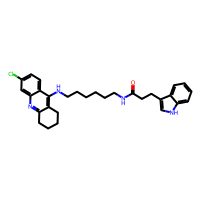
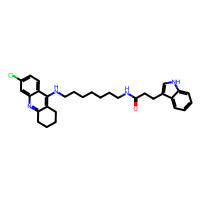
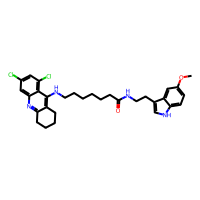
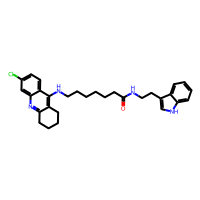
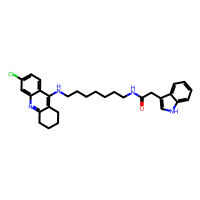
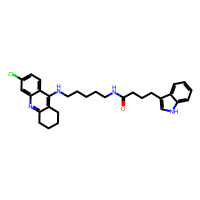
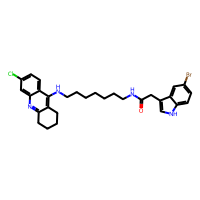
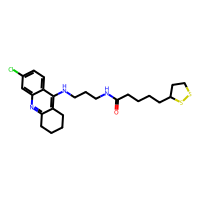
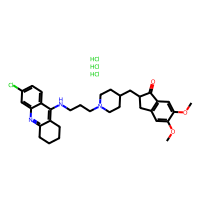
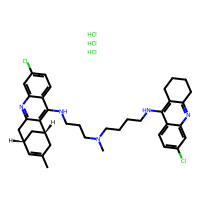
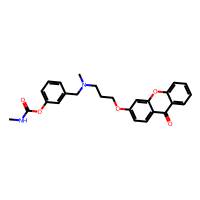
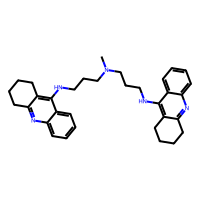
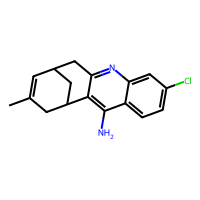
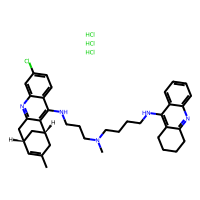
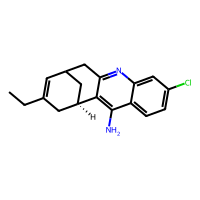
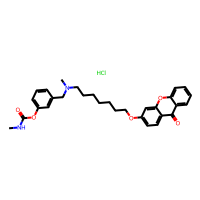
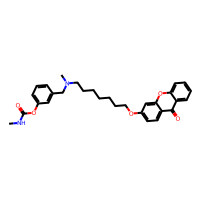
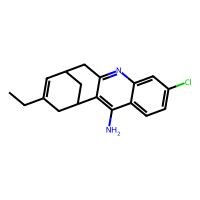
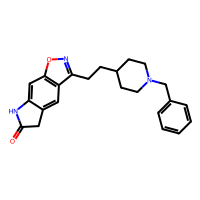
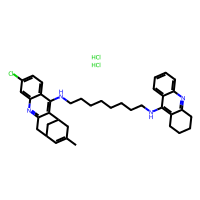
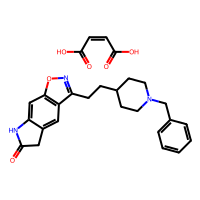
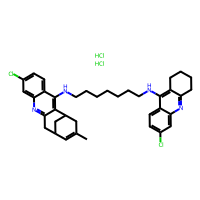
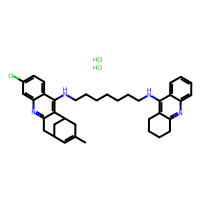
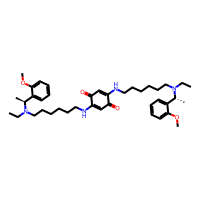
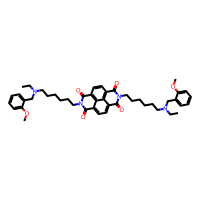
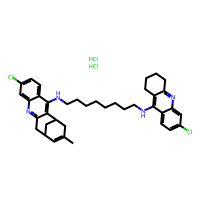
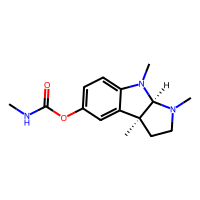
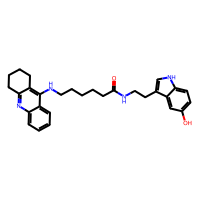
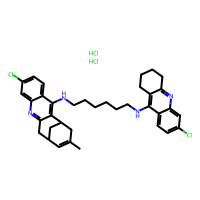
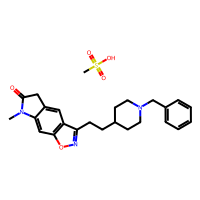
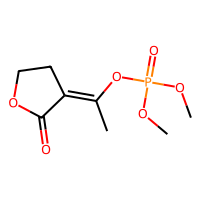
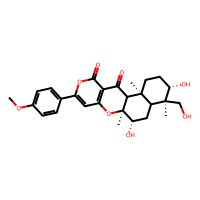
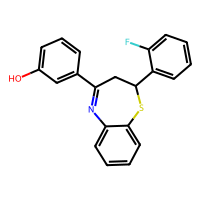
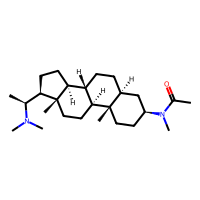
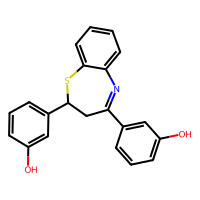
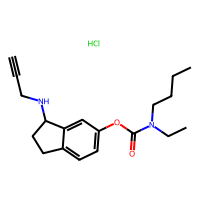
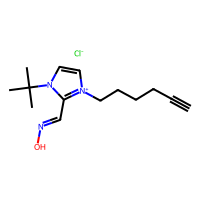
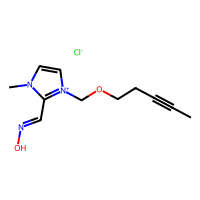
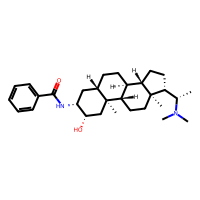
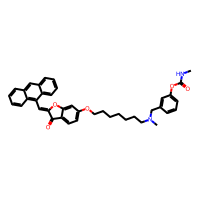
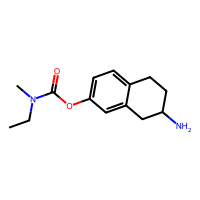
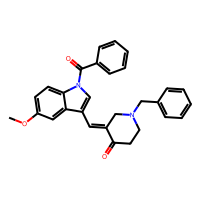
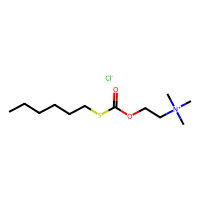
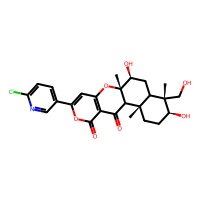
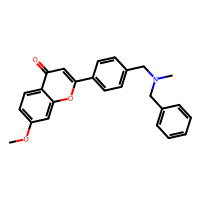
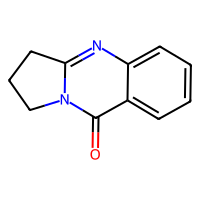
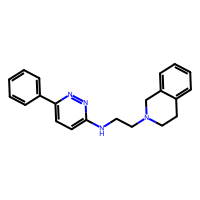
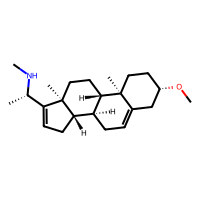
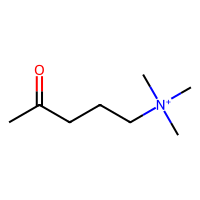
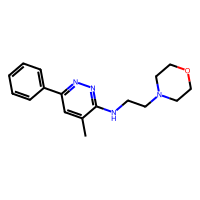
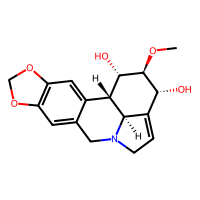
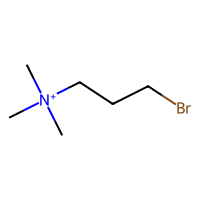
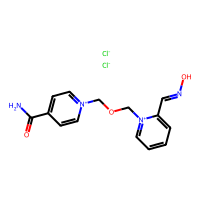
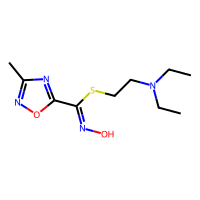
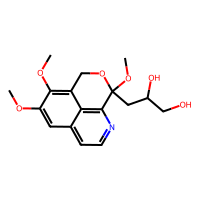
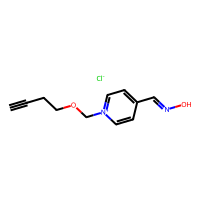
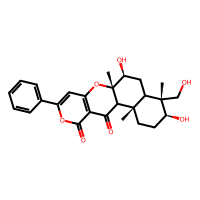
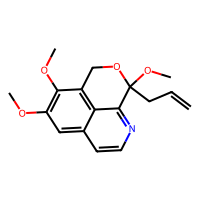
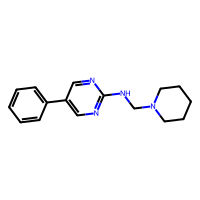
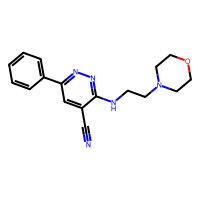

In [9]:
df3["fingerprints_df"] = df3["canonical_smiles"].apply(smiles_to_fp)
df3

In [10]:
df3['standard_relation'].value_counts()

=    1511
Name: standard_relation, dtype: int64

In [14]:
df3[df3['molecule_chembl_id']=="CHEMBL208599"]

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,canonical_smiles,standard_type,standard_units,standard_relation,standard_value,target_chembl_id,target_organism,pIC50,ROMol,fingerprints_df
14,1167481,CHEMBL644108,Inhibition of acetylcholinesterase isolated fr...,B,CHEMBL208599,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2,IC50,nM,=,0.32,CHEMBL220,Homo sapiens,9.49485,<rdkit.Chem.rdchem.Mol object at 0x0000021B6B1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now we can generate our variables

In [11]:
Y = df3.pIC50



In [12]:
fplist = df3.fingerprints_df.to_numpy().tolist()
X = pd.DataFrame(fplist)


In [13]:
X.shape, Y.shape

((1511, 167), (1511,))

We will then divide our database in such a way that 80% is used for training and the remaining 20% is used to check whether our prediction is close to reality, so from here we will create our model. 

In this way we will generate a "pattern" or predictive model that will deduce which pIC50 values (Y) are most likely to appear according to given fingerprints (X).

In [14]:
#Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #Split arrays or matrices into random train and test subsets.

In [15]:
X_train.shape, Y_train.shape

((1208, 167), (1208,))

In [16]:
X_test.shape, Y_test.shape

((303, 167), (303,))

In [17]:
#Building a Regression Model using Random Forest
model = RandomForestRegressor(n_estimators=100) #(n =number of trees in the ensemble)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
Y_pred = model.predict(X_test) #predict method on the test data

In [19]:
# Let’s check the difference between the actual and predicted values.
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
627,6.769551,6.654879
824,6.283997,6.594394
265,7.716699,7.829019
692,6.619789,6.392123
1136,5.397940,5.499928
17,9.489991,8.737447
825,6.283997,6.351137
3,10.000000,10.305756
107,8.346787,7.777426
53,9.000000,7.998073


It seems that our model is quite similar or at least close to reality. 

The next step is to plot the modelled values against the actual values and obtain a regression line.

<function matplotlib.pyplot.show(*args, **kw)>

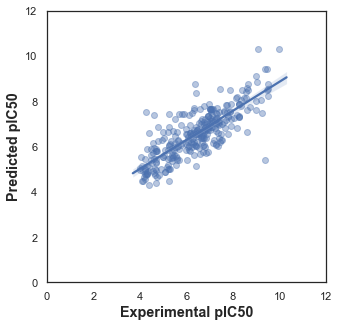

In [20]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.603927355488312
Mean Squared Error: 0.673081227463754
Root Mean Absolute Error: 0.8204152774441453


In [22]:
# To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.
#Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(Y_test, Y_pred) / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.14 %.


Most errors are moderately high, this may be related to the dispersion of our data and also to the values given for test and training. However, the accuracy of our model is quite high, so we conclude that it is a good model.

#### Use the model on our database

Finally, it is time to use our database from the previous exercise and apply to it the model we have just created to predict its pIC50.

In [23]:
#Load a database
Database = pd.read_csv('raw_databasefilter_CHEMBL208599.csv', delimiter=';' )
#Database = Database.set_axis(['ChemblID','Score','Smile'], axis=1, inplace=False)
Database = Database[["ChemblID", "Score", "Smile"]]
#Database.drop(['Tanimoto (MACCS)','Dice (MACCS)','Tanimoto (Morgan)', 'Dice (Morgan)'], axis=1, inplace=True)

PandasTools.AddMoleculeColumnToFrame(Database, smilesCol='Smile')
Database[["ChemblID", "Score", "Smile"]]


,ChemblID,Score,Smile
0,CHEMBL208599,1.000,CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
1,CHEMBL1684449,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
2,CHEMBL1739491,0.999,CC(C)C1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
3,CHEMBL4112162,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...
4,CHEMBL2021616,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...
5,CHEMBL140476,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
6,CHEMBL536047,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
7,CHEMBL1994202,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
8,CHEMBL2011499,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
9,CHEMBL1684446,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2


In [24]:
#Obtain the fingerprints (apply(smiles_to_fp))
Database["fingerprints_df"] = Database["Smile"].apply(smiles_to_fp)


In [25]:
# create a list with the fingerprint bits and transform it into a new dataframe
df_list=Database['fingerprints_df'].to_numpy().tolist()
fp=pd.DataFrame(df_list)


In [26]:
pIC50Predicted = model.predict(fp) #predict method on the test data


In [27]:
#Transform in a data frame
Predictiondf=pd.DataFrame({'pIC50Predicted':pIC50Predicted})

We prepare a filter by multiplying the maximum value of the predicted pIC50 by 0.95 and specifying that we want to use that as a cutoff to select all predicted pIC50 values above this cutoff.

In [28]:
cutoff = .95
pIC50cutoff = pIC50Predicted.max() * cutoff
initialCompounds = len(pIC50Predicted)
cutoffCompounds = len(pIC50Predicted[pIC50Predicted>pIC50cutoff])
print(f'Initial compounds: {initialCompounds}')
print(f'Compounds with cutoff > {cutoff}: {cutoffCompounds}')
print(f'Discarded compounds: {initialCompounds - cutoffCompounds}' )

Initial compounds: 68
Compounds with cutoff > 0.95: 18
Discarded compounds: 50


According to the above test, we will be left with 18 molecules after applying the filter.
We now concatenate the predicted pIC50 column to our database and apply the cutoff.

In [29]:
Finalprediction=pd.concat([Database,Predictiondf],axis=1)
Finalprediction=Finalprediction.loc[Finalprediction['pIC50Predicted'].astype('float') > pIC50cutoff]

# Reset index to fill the gaps
Finalprediction.reset_index(drop=True, inplace=True)

In [30]:
Finalprediction.to_csv('./Finalprediction_copy1.csv', sep=';', index=False)
Finalprediction

,ChemblID,Score,Smile,ROMol,fingerprints_df,pIC50Predicted
0,CHEMBL208599,1.000,CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447
1,CHEMBL4112162,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
2,CHEMBL2021616,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
3,CHEMBL140476,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
4,CHEMBL536047,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
5,CHEMBL1994202,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
6,CHEMBL2011499,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823
7,CHEMBL1684446,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447
8,CHEMBL1985472,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447
9,CHEMBL143812,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447


And so we finally got our database of candidate molecules filtered by pIC50.

##  The Rule of Five (ADME)

The rule of five (RO5) is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans. The rule describes molecular properties important for a drug's pharmacokinetics in the human body, including their absorption, distribution, metabolism, and excretion ("ADME"). 

We can calculate the Rule of Five properties (molecular weight, number of hydrogen bond acceptors and donors, and logP) using some of the descriptors available in rdkit. 

We will use our latest database, Finalprediction, where we have all our molecules of interest.

In [31]:
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

First, we define the function that calculates the properties of the RO5:
- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- A calculated octanol-water partition coefficient (Clog P) that does not exceed 5
- Polar surface area no greater than 140 Å2

In [32]:
def calculate_ro5_properties(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    TPSA = Descriptors.TPSA (molecule)
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5, TPSA < 140]
    ro5_fulfilled = sum(conditions) == 5 
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, TPSA, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "TPSA", "ro5_fulfilled"],
    )

In [34]:
# Calculate RO5 properties for all molecules
ro5_properties = Finalprediction["Smile"].apply(calculate_ro5_properties)
#Mix the Ro5 dataframe with the read csv
MoleculeDatabase_Concat = pd.concat([Finalprediction, ro5_properties], axis=1)
#And separate by valid and invalid drugs (~ negates boolean values)
MoleculeDatabase_ro5_fulfilled = MoleculeDatabase_Concat[MoleculeDatabase_Concat["ro5_fulfilled"]]
MoleculeDatabase_ro5_violated = MoleculeDatabase_Concat[~MoleculeDatabase_Concat["ro5_fulfilled"]]
print(f"{len(MoleculeDatabase_ro5_fulfilled)} Ro5-following compounds were found")

17 Ro5-following compounds were found


### Visualize the Ro5 properties
To better understand how our compounds fall in the Ro5 (which we are using as a shortcut to predict ADME) scale, here we will calculate some statistical parameters, and represent them using a radar plot.

First, we will define a helper function to calculate the mean and standard deviation of our list of molecules

In [35]:
def calculate_mean_std(dataframe):
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats

Then, we apply the function the the Ro5-fulfilled and the Ro5-violating compounds:

In [36]:
MolDB_ro5_true_stats = calculate_mean_std(MoleculeDatabase_ro5_fulfilled[["molecular_weight",
                                                                          "n_hba", "n_hbd", "logp", "TPSA"]])
MolDB_ro5_false_stats = calculate_mean_std(MoleculeDatabase_ro5_violated[["molecular_weight", "n_hba", 
                                                                          "n_hbd", "logp", "TPSA"]])

Now, we have to define the functions that will help us plot the data. Since the properties used for the Ro5 criteria are of different magnitudes (the MWT has a threshold of 500, the number of HBAs and HBDs and the LogP have thresholds of only 10, 5, and 5, respectively, and TPSA has a threshold of 140), we want to tranform all scales to a 1-to-5 scale, so that it their meaning can be better understood. We will use the following formula:

```scaled property value = property value / property threshold * scaled property threshold```

    scaled MWT = MWT / 500 * 5 = MWT / 100
    scaled HBA = HBA / 10 * 5 = HBA / 2
    scaled HBD = HBD / 5 * 5 = HBD
    scaled LogP = LogP / 5 * 5 = LogP
    scaled TPSA = TPSA/140 *5 = TPSA / 28

We can thus define our scaling function:

In [37]:
MolDB_ro5_true_stats = calculate_mean_std(MoleculeDatabase_ro5_fulfilled.sort_values('Score', ascending=False).head(5)[["molecular_weight",
                                                                          "n_hba", "n_hbd", "logp", "TPSA"]])


In [38]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

For the axis of our function, since we want it to be a radar plot, we would like for the axis to be at different angles. Thus, we define a function that divides the sphere and returns the angles in radians: for example, for 4 properties, we want to set the axes at 0°, 90°, 180°, and 270° (in radians)

In [39]:
def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

Finally, we define the plotting function, using code from stackoverflow:

In [40]:
def plot_radar(y, thresholds, scaled_threshold, properties_labels, y_max=None, output_path=None):
    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * 6, "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("Mean", "Mean + StD", "Mean - StD", "Rule of Five area")
    ax.legend(labels, loc=(1.1, 0.9), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In order to plot, we first define our treshold parameters:

In [41]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5, "TPSA":140}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
    "TPSA / 28"
]
y_max = 8

And then, we plot the Radar chart for Ro5-fulfilling molecules.

The blue square shows the area where a molecule's physicochemical properties passed the Ro5 rules. The blue line highlights the mean values, while the orange dashed lines show the standard deviations.

We will quickly visualise how many molecules fall under the rule of 5 and how many do not.

In [42]:
print(f'Molecules which fullfill RO5: {len(MoleculeDatabase_ro5_fulfilled)}\nMolecules which violate RO5: { len(MoleculeDatabase_ro5_violated)}')

Molecules which fullfill RO5: 17
Molecules which violate RO5: 1


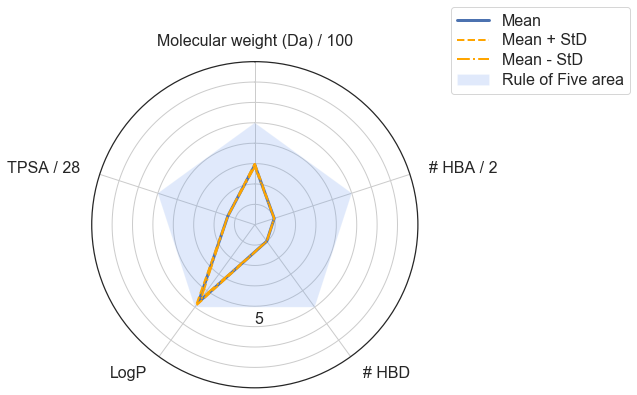

In [43]:
plot_radar(MolDB_ro5_true_stats, thresholds, scaled_threshold, properties_labels, y_max)

We see that our compounds have their logP values and their molecular weight a bit unbalanced but they fit in the rule.

And we also plot for the Ro5-violating ones:

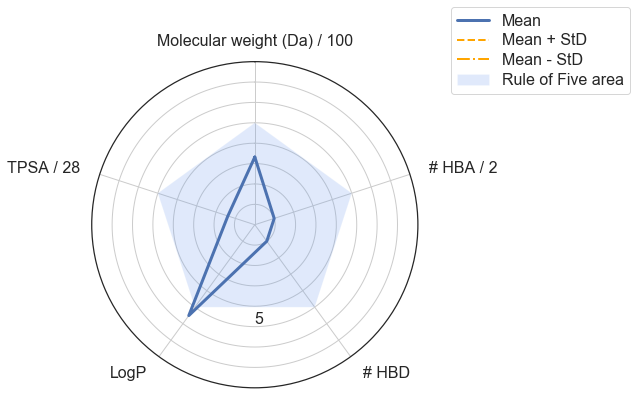

In [45]:
plot_radar(MolDB_ro5_false_stats, thresholds, scaled_threshold, properties_labels, y_max)

We note that the only molecule that does not comply with the rule of 5 only violates one of the rules, LogP, and only slightly.

Also the logP is one of the more important propierties of the RO5 because the solubility is very important for creating  a soluble human drug. In our case, the molecules that fall within the rule of five have relatively good parameters, but if we want to discard a value because it is a bit out of the parameters, we should not exclude logP.

Finally, we can plot some instagrams to better understand the distribution of values in our accepted molecules:

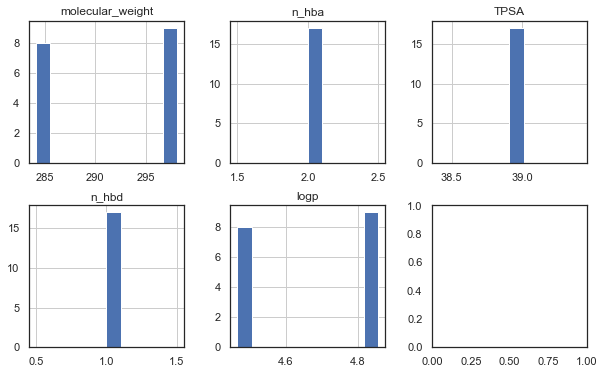

In [46]:
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)
MoleculeDatabase_ro5_fulfilled.hist(["molecular_weight"], ax=axes[0, 0])
MoleculeDatabase_ro5_fulfilled.hist(["n_hba"], ax=axes[0, 1])
MoleculeDatabase_ro5_fulfilled.hist(["n_hbd"], ax=axes[1, 0])
MoleculeDatabase_ro5_fulfilled.hist(["logp"], ax=axes[1, 1])
MoleculeDatabase_ro5_fulfilled.hist(["TPSA"], ax=axes[0, 2])
fig;

We will now extract the smile column of our 17 candidate molecules because we will need them for the last step.

In [54]:
MoleculeDatabase_ro5_fulfilled.reset_index(drop=True, inplace=True)
MoleculeDatabase_ro5_fulfilled

,ChemblID,Score,Smile,ROMol,fingerprints_df,pIC50Predicted,molecular_weight,n_hba,n_hbd,logp,TPSA,ro5_fulfilled
0,CHEMBL208599,1.000,CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447,298.123676,2,1,4.8565,38.91,True
1,CHEMBL4112162,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
2,CHEMBL2021616,0.999,CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N...,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
3,CHEMBL140476,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
4,CHEMBL536047,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
5,CHEMBL1994202,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
6,CHEMBL2011499,0.999,CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.009823,284.108026,2,1,4.4664,38.91,True
7,CHEMBL1684446,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447,298.123676,2,1,4.8565,38.91,True
8,CHEMBL1985472,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447,298.123676,2,1,4.8565,38.91,True
9,CHEMBL143812,0.999,CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2,<rdkit.Chem.rdchem.Mol object at 0x0000023FC3B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.737447,298.123676,2,1,4.8565,38.91,True


In [62]:
smilecolumn=MoleculeDatabase_ro5_fulfilled['Smile']
smilecolumn.to_csv("smilecolumn.csv", sep=';', index=False)

D:\PortableApps\Anaconda\A3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


## Docking using Dockstring

The last step consists of docking the candidate molecules, this procedure consists of searching for the optimal conformation and position of a ligand within a molecular target. For this process we will use Dockstring, a Python package capable of automating and standardising the preparation of ligands and performing the subsequent docking with the target molecule by simply using the smiles of the ligands. This package was developed by six researchers at the University of Cambridge, who published the official version of the program along with a paper on 18 July 2022. Within the Python package there are 58 processed target molecules ready for docking, including AChE. For more information on how the code works and how to access the researchers' official websites, go to:https://dockstring.github.io/

This package however, is not supported by windows or MAC, only by Linux, so I will add here the codes I wrote and the results I got from the Linux environment.

As inputs I simply added all the smiles of the 17 candidate molecules in addition to the molecule that I had to discard in the first step because it did not meet the RO5 even though it had the lowest IC50 because I wanted to test it, and specified AChE (a molecule already processed and provided in the package) as the target.

In [ ]:
"""Invoking dockstring."""

# Input

from dockstring import load_target

smiles = [
 'CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CCC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2',
 'CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2',
 'CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2']
#smiles = ['CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2']
#smiles = ['CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F']
if __name__ == "__main__":
    target = load_target("ACHE")
    for smile in smiles:
        print(f"calculating docking from {smile}")
        score, aux = target.dock(smile)
        print(f"Docking was successful, smile: {smile}   score={score:.3g}")
        print(f"       Affinities: {aux['affinities']}")

**Output**

1. calculating docking from CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CCC1=CC2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.1**
       Affinities: [-10.1, -9.7, -9.3, -8.4, -7.9, -7.9, -7.8, -7.8, -7.7]
2. calculating docking from CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.6, -7.5, -7.5]
3. calculating docking from CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=C[C@@H]2C[C@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.6, -7.5, -7.5]
4. calculating docking from CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.7, -7.6, -7.5]
5. calculating docking from CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.7, -7.6, -7.5]
6. calculating docking from CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.7, -7.6, -7.5]
7. calculating docking from CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-10.2**
       Affinities: [-10.2, -9.4, -9.0, -8.4, -8.1, -7.9, -7.7, -7.6, -7.5]
8. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-12.1**
       Affinities: [-12.1]
9. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-12.1**
       
       Affinities: [-12.1]       
10. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-12.1**
       
       Affinities: [-12.1]   
       
       
11. calculating docking from CCC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CCC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-11.6**
       
       Affinities: [-11.6, -9.0]
       
       
12. calculating docking from CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-11.5**
       
       Affinities: [-11.5, -8.9]
       
       
13. calculating docking from CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2
Docking was successful, smile: CC1=C[C@H]2C[C@@H](C1)C1=C(N)C3=CC=C(Cl)C=C3N=C1C2   **score=-11.5**
      
      Affinities: [-11.5, -8.9]
       
       
14. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2   **score=-11.9**
       
       Affinities: [-11.9, -9.4]
       
       
15. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=CC(Cl)=CC=C3N=C1C2   **score=-11.9**
       
       Affinities: [-11.9, -9.4]
       
       
16. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2   **score=-10.9**
       
       Affinities: [-10.9, -10.4, -8.8, -8.1, -8.0]
       
       
17. calculating docking from CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2
Docking was successful, smile: CCC1=CC2CC(C1)C1=C(N)C3=C(Cl)C=CC=C3N=C1C2   **score=-10.9**
       
       Affinities: [-10.9, -10.4, -8.8, -8.1, -8.0]
       
       
18. (**CHEMBL338755**) calculating docking from CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2
Docking was successful, smile: CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2   **score=-12.7**
       
       Affinities: [-12.7, -12.4, -12.4, -12.1, -11.9, -11.8, -11.7, -11.7, -11.6]




As can be seen, the programme directly gives us the affinity scores, and we asked it to show us all the affinities it found for each molecule (the programme checks several positions of the ligand, but only shows the final score with the lowest score, i.e. the best position).
Molecules 8 to 10, although they have different CHEMBL codes, are the same molecule and therefore share the same smile. As can be seen, this molecule gives the best affinity with our target, so it is the best candidate to be considered as a potential drug. 

However, it is interesting to note that, although the last molecule does not comply with RO5, it is the one that seems to have the highest affinity for the target. A more elaborate discussion of this phenomenon can be found in the paper "Final Assignment" to which this notebook is an appendix.